<a href="https://colab.research.google.com/github/Andrea-24744/Simulaci-n-1/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MONTE CARLO CRUDO- ACIERTO Y ERROR
*Santelices Medina Andrea*

<p style="text-align: justify;">John von Neumann y Stanislaw Ulam inventaron las simulaciones de Monte Carlo, o el método de Monte Carlo, en la década de 1940. Le pusieron el nombre del famoso lugar de apuestas de Mónaco porque el método comparte la misma característica aleatoria que el juego de la ruleta.
Las simulaciones de Monte Carlo proporcionan múltiples salidas posibles y la probabilidad de cada una de estas a partir de un gran conjunto de muestras de datos aleatorios. Ofrece un panorama más claro que una previsión determinista.</p>

<p style="text-align: justify;">Un análisis de Monte Carlo consta de variables de entrada, variables de salida y un modelo matemático. El sistema de computación introduce variables independientes en un modelo matemático, las simula y produce variables dependientes.
Para aplicar el método de Monte Carlo "acierto y error" se siguen los siguientes pasos:</p>

1. Generar una secuencia $\{U_i\}_{i=1}^{2n} \sim U_{ni}f(0, 1).$
2. Conformar pares $(U_i, U_{n+i}),$ para i = 1, ..., n.
3. Calcular $Xi = a + U_i(b − a),$ para i = 1, ..., n.
4. Calcular $g(Xi),$ para i = 1, ..., n.
5. Contar los aciertos $n_a$ tales que $g(Xi) > cU_{n+i}$
6. Estimar $I$ calculando la media muestral $Θ_2$

La probabilidad es: 0.6291324943789128


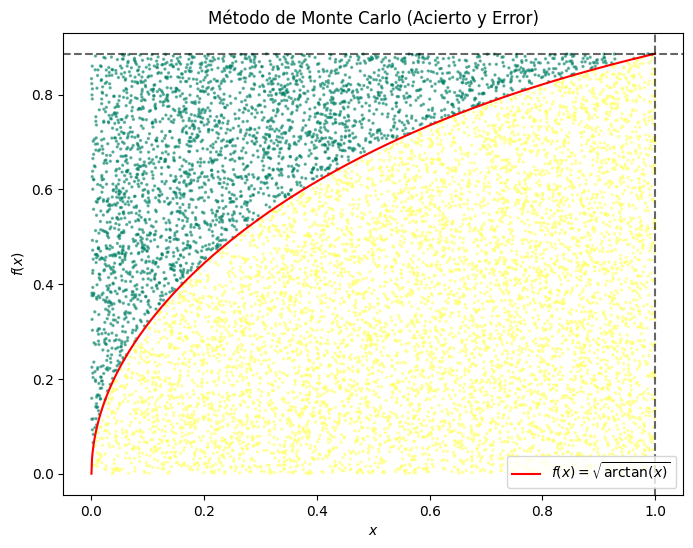

In [99]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import math
# Funciòn exacta
def f(x):
    return np.sqrt(np.arctan(x))
x = np.linspace(0,1,100)
y = f(x)

# Veces del lanzamiento del dado, asì como la probabilidad de caer dentro de la circunferencia
def dardos(n):
    exitos = 0
    x_vals = []
    y_vals = []
    bajo_lacurva =[]

    for _ in range(n):
        u1 = rd.random()  # x aleatorio en [0,1]
        u2 = rd.random() * f(1)  # y aleatorio en [0, f(1)]

        x_vals.append(u1)
        y_vals.append(u2)
        bajo_lacurva.append(u2 <= f(u1))

        if u2 <= f(u1):
            exitos += 1

    # Estimación de la integral
    area_rect = 1 * f(1)  # Base * Altura
    integral_estimada = (exitos / n) * area_rect

    return integral_estimada, x_vals, y_vals, bajo_lacurva

integral_estimada, x_vals, y_vals, bajo_lacurva = dardos(10000)
print("La probabilidad es:",integral_estimada)
x = np.linspace(0, 1, 1000)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r-', label='$f(x) = \\sqrt{\\arctan(x)}$')  # Curva de la función
plt.scatter(x_vals, y_vals, c=bajo_lacurva, cmap='summer', alpha=0.5, s=2)  # Puntos aleatorios
plt.axhline(f(1), color='black', linestyle='--', alpha=0.6)
plt.axvline(1, color='black', linestyle='--', alpha=0.6)

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Método de Monte Carlo (Acierto y Error)")
plt.legend()
plt.show()


In [101]:
#Establecemos el valor exacto de nuestra funciòn
from sympy import integrate, Symbol, sqrt, atan
x = Symbol('x')
funcional = integrate( sqrt(atan(x)), (x, 0, 1))
resul = funcional.evalf()
print(resul)

0.629823344207973


In [102]:
#Determinaciòn del error
import pandas as pd
error = resul - integral_estimada
print(error)

0.000690849829060536


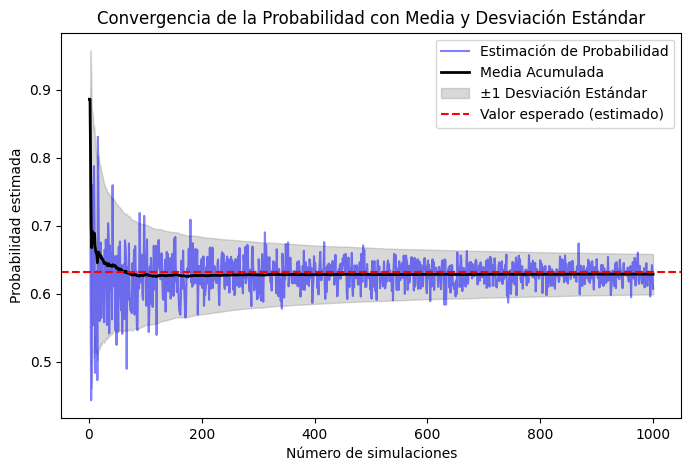

In [137]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

# Función para evaluar múltiples iteraciones
def exp(m):
    probabilidades = []
    medias = []
    desviaciones = []

    for i in range(1, m + 1):
        integral_estimada,_,_ ,_= dardos(i)  # Estimación para i simulaciones, sin considerar los valores de mis x, y area bajo la curva (por eso los espacio ,_,_,_)
        probabilidades.append(integral_estimada)

        # Media acumulada
        media_actual = np.mean(probabilidades)
        medias.append(media_actual)

        # Desviación estándar acumulada
        if len(probabilidades) > 1:
            desviacion_actual = np.std(probabilidades, ddof=1)
        else:
            desviacion_actual = 0  # No hay desviación en la primera iteración

        desviaciones.append(desviacion_actual)

    return probabilidades, medias, desviaciones

m = 1000
probabilidades, medias, desviaciones = exp(m)

# Rango de simulaciones
x_interv = range(1, m + 1)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(x_interv, probabilidades, label="Estimación de Probabilidad", color="blue", alpha=0.5)
plt.plot(x_interv, medias, label="Media Acumulada", color="black", linewidth=2)

# Bandas de ±1 desviación estándar
plt.fill_between(x_interv,
                 np.array(medias) - np.array(desviaciones),
                 np.array(medias) + np.array(desviaciones),
                 color="gray", alpha=0.3, label="±1 Desviación Estándar")

plt.axhline(0.632, linestyle="--", color="red", label="Valor esperado (estimado)")
plt.xlabel("Número de simulaciones")
plt.ylabel("Probabilidad estimada")
plt.title("Convergencia de la Probabilidad con Media y Desviación Estándar")
plt.legend()
plt.show()